In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/laura/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
p_air = 1.2
p_water = 1e3
mu_air = 1.8e-5
mu_water = 1e-3

def Reynold(p, v, L, mu): # get Re from density, flow speed, characteristic lenght, viscosity
    return p * v * L / mu

def v_from_R(p, mu, D = 0.1, Re = 3*1e5):
    return (Re*mu / (D*p))

def Fd(p, v, C_D = 0.47, D = 0.1):
    return 0.5 * C_D * p * v**2 * D**2 * 3.14 / 4

v_air_max = v_from_R(p_air, mu_air)
v_water_max = v_from_R(p_water, mu_water)

print(f"v_max estimates in air: {v_air_max:.2f} m/s")
print(f"v_max estimates in water: {v_water_max:2f} m/s")

v_max estimates in air: 45.00 m/s
v_max estimates in water: 3.000000 m/s


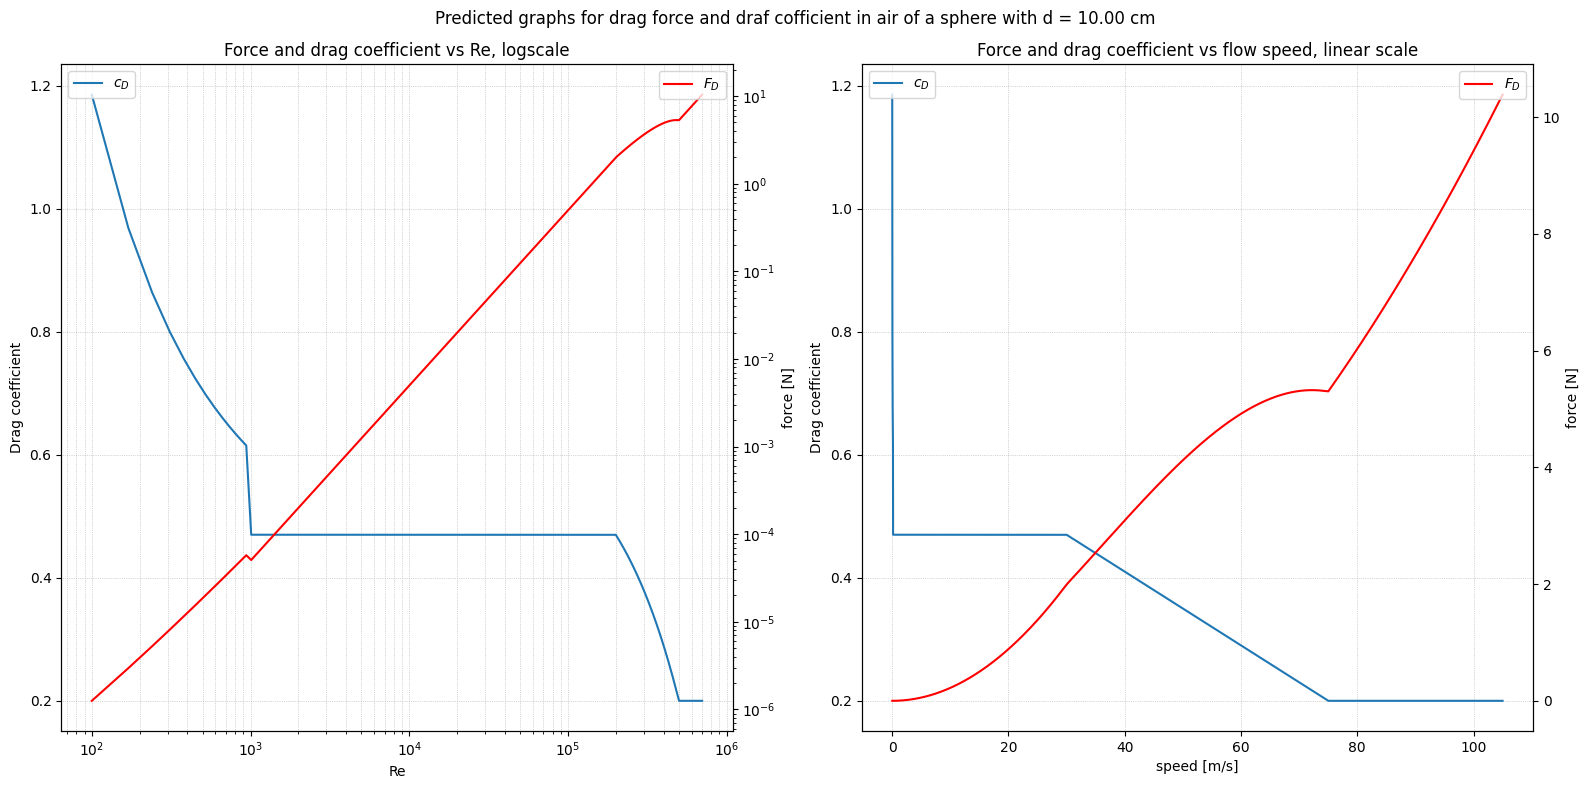

In [3]:
d = 0.1 # diameter of the sphere
Re_min = 100
Re_max = 7e5
v_min = v_from_R(p_air, mu_air, d, Re_min)
v_max = v_from_R(p_air, mu_air, d,  Re_max)
v_range = np.linspace(v_min, v_max, 10000)
Re_range = np.linspace(Re_min, Re_max, 10000)
Cd_range = np.zeros(10000)

# aproximation for drag coefficient as a function of Re
for i, Re in enumerate(Re_range):
    if Re < 1e3:
        Cd_range[i] = 24 / Re + 6 / (1 + np.sqrt(Re)) + 0.4
    elif Re >= 1e3 and Re < 2e5:
        Cd_range[i] = 0.47
    elif Re >= 2e5 and Re < 5e5:
        Cd_range[i] = 0.47 - 0.27 * (Re - 2e5) / 3e5
    elif Re >= 5e5:
        Cd_range[i] = 0.2

Fd_range = Fd(p_air, v_range, Cd_range, d)

fig = plt.figure(figsize=(16, 8))
ax1, nolog1 = fig.subplots(1, 2)
fig.suptitle(f"Predicted graphs for drag force and draf cofficient in air of a sphere with d = {d*100:.2f} cm")

ax1.semilogx(Re_range, Cd_range, label = "$c_D$")
ax1.set_ylabel("Drag coefficient")
ax1.set_xlabel("Re")
ax2 = ax1.twinx()
ax2.loglog(Re_range, Fd_range, color='red', label = "$F_D$")
ax2.set_ylabel("force [N]")
ax1.grid(True, which='both', linestyle=':', linewidth=0.5)
ax1.set_title("Force and drag coefficient vs Re, logscale")
ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")

nolog1.plot(v_range, Cd_range, label = "$c_D$")
nolog1.set_ylabel("Drag coefficient")
nolog1.set_xlabel("speed [m/s]")
nolog2 = nolog1.twinx()
nolog2.plot(v_range, Fd_range, color='red', label = "$F_D$")
nolog2.set_ylabel("force [N]")
nolog1.grid(True, which='both', linestyle=':', linewidth=0.5)
nolog1.set_title("Force and drag coefficient vs flow speed, linear scale")
nolog1.legend(loc = "upper left")
nolog2.legend(loc = "upper right")

plt.tight_layout()
plt.show()

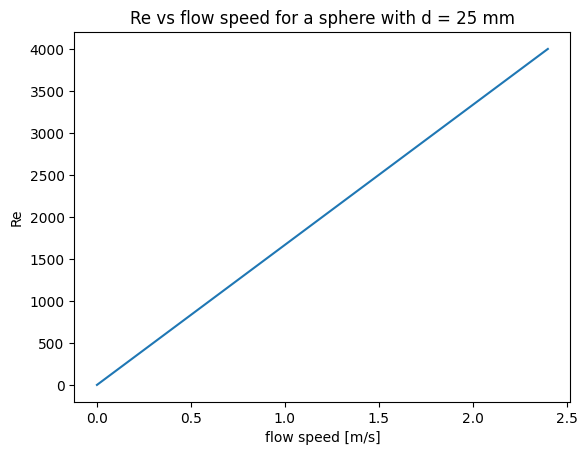

In [4]:
# velocity vs Re for visualisation purposed
d = 0.025
Re_min = 1
Re_max = 4000
v_min = v_from_R(p_air, mu_air, d, Re_min)
v_max = v_from_R(p_air, mu_air, d,  Re_max)
v_range = np.linspace(v_min, v_max, 10000)
Re_range = np.linspace(Re_min, Re_max, 10000)

#plot
fig = plt.figure()
ax = fig.subplots(1, 1)
ax.plot(v_range, Re_range)
ax.set_xlabel("flow speed [m/s]")
ax.set_ylabel("Re")
ax.set_title(f'Re vs flow speed for a sphere with d = {d*1000:.0f} mm')
plt.show()
